<a href="https://colab.research.google.com/github/0305nitin/IE0005/blob/main/Loan_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Data Import

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso                # For visualizing missing data
import seaborn as sns
import warnings                        # To manage warning messages
import os                              # To interact with the operating system
import scipy.stats                     # For statistical tests and distributions

from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation
from sklearn.preprocessing import MinMaxScaler                       # For feature scaling
from sklearn.model_selection import train_test_split                 # To split the data into training and testing sets
from imblearn.over_sampling import SMOTE                             # For handling imbalanced datasets with oversampling

# For machine learning models
from sklearn.linear_model import LinearRegression                    # For Linear Regression
from sklearn.tree import DecisionTreeClassifier                      # For Decision Tree models
from sklearn.ensemble import RandomForestClassifier                  # For Random Forest models

# For PyTorch
import torch                                                         # Main PyTorch library for tensor operations and deep learning

# For CatBoost
from catboost import CatBoostClassifier                              # For CatBoost model


In [ ]:
#Import Data
loan = pd.read_csv("loan_dataset.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(loan.shape)

(614, 13)


We have 614 Observations (rows) in our dataset

From the information above we understand we have 12 columns with data, and 1 column with the outcome. (As it starts from 0)

# EDA

In [ ]:
#We have already looked at our dataset, our target is to predict whether an Individual will be approved for a loan.

In [ ]:
# We will now explore each column (Uni-Variate) and then (Multi-Variate)

Uni-Variate Exploration

In [ ]:
#Loan_ID
loan.Loan_ID.value_counts(dropna=False)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

In [ ]:
All unique codes

Number of Gender Categories (includes NA) : 3
Gender
Male      489
Female    112
Name: count, dtype: int64


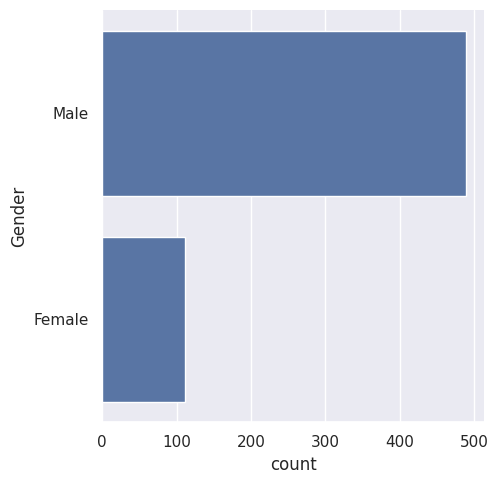

In [ ]:
# Genders in the Dataset
print("Number of Gender Categories (includes NA) :", len(loan["Gender"].unique()))

# Genders
print(loan["Gender"].value_counts())
sns.catplot(y = "Gender", data = loan, kind = "count")

In [ ]:
gender_counts = loan['Gender'].value_counts(dropna=False, normalize=True) * 100

#Percentage of each Gender Categories:
for gender, percentage in gender_counts.items():
    print(f"{gender}: {percentage:.2f}%")


Male: 79.64%
Female: 18.24%
nan: 2.12%


Mostly male dominated applications.

Number of Married Categories (includes NA): 3
Married
Yes    398
No     213
Name: count, dtype: int64


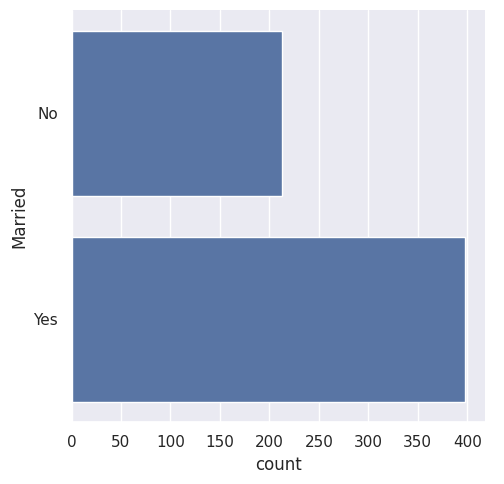

Yes: 64.82%
No: 34.69%
nan: 0.49%


In [ ]:
# Married statuses in the Dataset
print("Number of Married Categories (includes NA):", len(loan["Married"].unique()))

# Married statuses
print(loan["Married"].value_counts())
sns.catplot(y = "Married", data = loan, kind = "count")
plt.show()

married_counts = loan['Married'].value_counts(dropna=False, normalize=True) * 100

# Percentage of each Category
for status, percentage in married_counts.items():
    print(f"{status}: {percentage:.2f}%")


Mostly Married Couples

Number of Education Categories (includes NA): 2
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


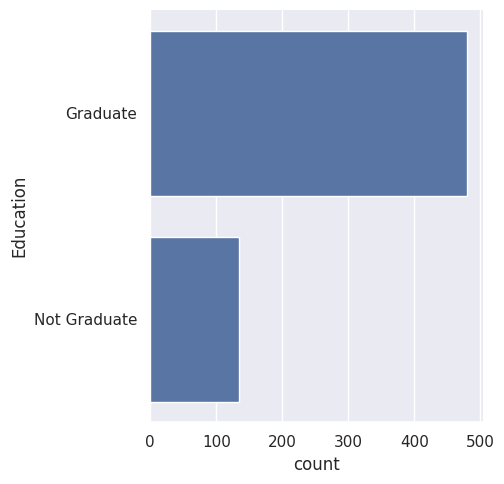

Graduate: 78.18%
Not Graduate: 21.82%


In [ ]:
# Education levels in the Dataset
print("Number of Education Categories (includes NA):", len(loan["Education"].unique()))

# Education levels
print(loan["Education"].value_counts())
sns.catplot(y = "Education", data = loan, kind = "count")
plt.show()

education_counts = loan['Education'].value_counts(dropna=False, normalize=True) * 100

# Percentages:
for education, percentage in education_counts.items():
    print(f"{education}: {percentage:.2f}%")


In [ ]:
People who have Graduated are the Majority.

Number of Self_Employed Categories (includes NA): 3
Self_Employed
No     500
Yes     82
Name: count, dtype: int64


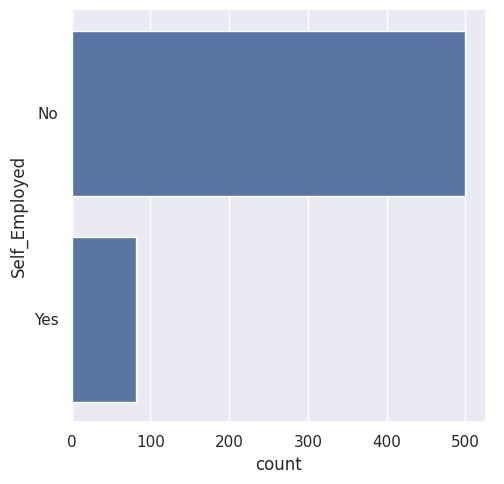

No: 81.43%
Yes: 13.36%
nan: 5.21%


In [ ]:
# Self_Employed statuses in the Dataset
print("Number of Self_Employed Categories (includes NA):", len(loan["Self_Employed"].unique()))

# Self_Employed statuses
print(loan["Self_Employed"].value_counts())
sns.catplot(y = "Self_Employed", data = loan, kind = "count")
plt.show()

self_employed_counts = loan['Self_Employed'].value_counts(dropna=False, normalize=True) * 100

# Percentages:
for status, percentage in self_employed_counts.items():
    print(f"{status}: {percentage:.2f}%")


In [ ]:
#Most are Employed by a company rather than running their own business.

Number of Credit_History Categories (includes NA): 3
Credit_History_Cat
Yes    475
No      89
Name: count, dtype: int64


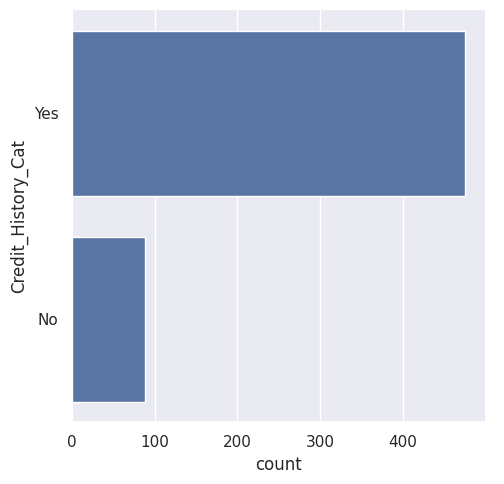

Credit History 'Yes': 77.36%
Credit History 'No': 14.50%
Credit History 'nan': 8.14%


In [ ]:
# '1' represents 'Yes' and '0' represents 'No' in the 'Credit_History' column
# Map numeric values to 'Yes' or 'No'
loan['Credit_History_Cat'] = loan['Credit_History'].map({1: 'Yes', 0: 'No'})

# Credit_History categories in the Dataset
print("Number of Credit_History Categories (includes NA):", len(loan["Credit_History_Cat"].unique()))

# Credit_History categories
print(loan["Credit_History_Cat"].value_counts())
sns.catplot(y = "Credit_History_Cat", data = loan, kind = "count")
plt.show()

credit_history_counts = loan['Credit_History_Cat'].value_counts(dropna=False, normalize=True) * 100

# Percentages:
for history, percentage in credit_history_counts.items():
    print(f"Credit History '{history}': {percentage:.2f}%")


In [ ]:
Most customers already have a Credit History ready.

Number of Property_Area Categories: 3
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


<ipython-input-310-4c08ede8733b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Property_Area", data=loan, kind="count", palette="cool")


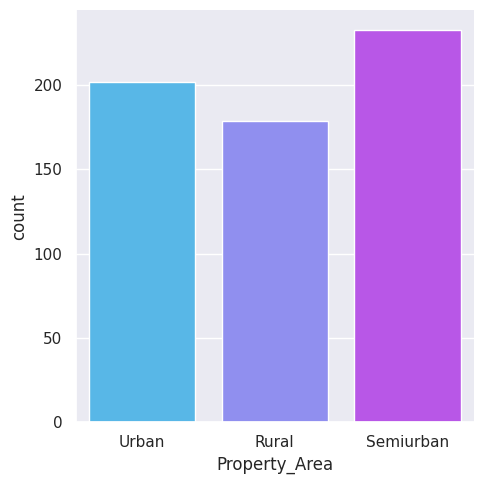

Semiurban: 37.95%
Urban: 32.90%
Rural: 29.15%


In [ ]:
# Property Area categories in the Dataset
print("Number of Property_Area Categories:", len(loan["Property_Area"].unique()))

# Property Area categories
print(loan["Property_Area"].value_counts())
sns.catplot(x="Property_Area", data=loan, kind="count", palette="cool")
plt.show()

property_area_counts = loan['Property_Area'].value_counts(normalize=True) * 100

# Percentages:
for area, percentage in property_area_counts.items():
    print(f"{area}: {percentage:.2f}%")


Semiurban has the most followed by Urban.

Loan_Status
Y    422
N    192
Name: count, dtype: int64


<ipython-input-312-50f868b5da73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Loan_Status", data=loan, kind="count", palette="Set2")


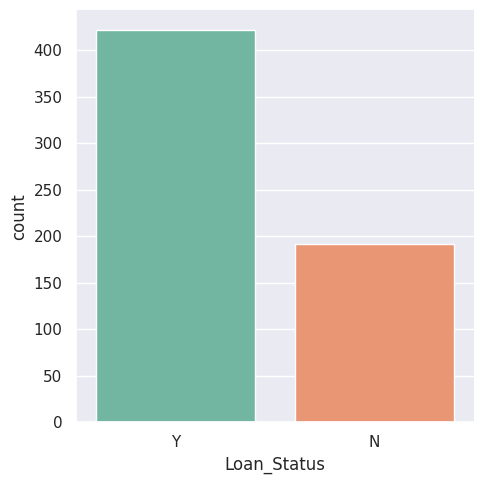

Y: 68.73%
N: 31.27%


In [ ]:
# Loan Status categories
print(loan["Loan_Status"].value_counts())
sns.catplot(x="Loan_Status", data=loan, kind="count", palette="Set2")
plt.show()

loan_status_counts = loan['Loan_Status'].value_counts(normalize=True) * 100

# Percentages:
for status, percentage in loan_status_counts.items():
    print(f"{status}: {percentage:.2f}%")


68.7% of Loans were approved while rest was rejected. This gives us a strong dataset to create a Machine learning model.

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


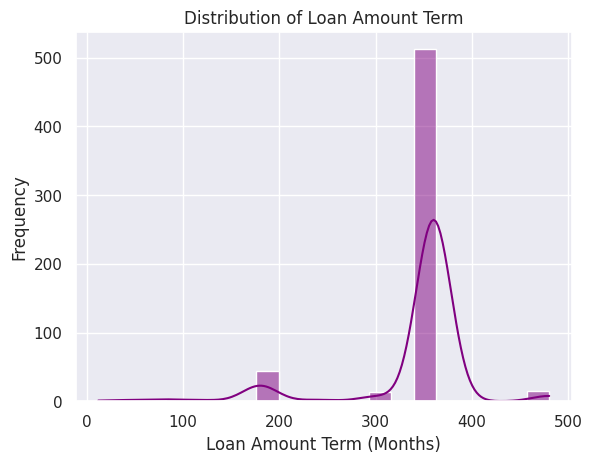

In [ ]:
# Summary of Loan Amount Terms
print(loan["Loan_Amount_Term"].describe())

# Histogram to visualize the distribution of Loan Amount Terms
sns.histplot(data=loan, x="Loan_Amount_Term", bins=20, color="purple", kde=True)
plt.title("Distribution of Loan Amount Term")
plt.xlabel("Loan Amount Term (Months)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Convert Loan Amount Term from months to years
loan['Loan_Amount_Term_Years'] = loan['Loan_Amount_Term'] / 12

# Calculate the frequency of each term in years
loan_amount_term_years_counts = loan['Loan_Amount_Term_Years'].value_counts(dropna=False).sort_index()

# Calculate percentages
loan_amount_term_years_percentages = loan_amount_term_years_counts / loan_amount_term_years_counts.sum() * 100

# Display the years and their corresponding percentages
print("Years and their corresponding percentages:")
for years, percentage in loan_amount_term_years_percentages.items():
    print(f"{years:.1f} years: {percentage:.2f}%")


Years and their corresponding percentages:
1.0 years: 0.16%
3.0 years: 0.33%
5.0 years: 0.33%
7.0 years: 0.65%
10.0 years: 0.49%
15.0 years: 7.17%
20.0 years: 0.65%
25.0 years: 2.12%
30.0 years: 83.39%
40.0 years: 2.44%
nan years: 2.28%


# Numerical data

Multi-Variate Exploration

In [ ]:
loan[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


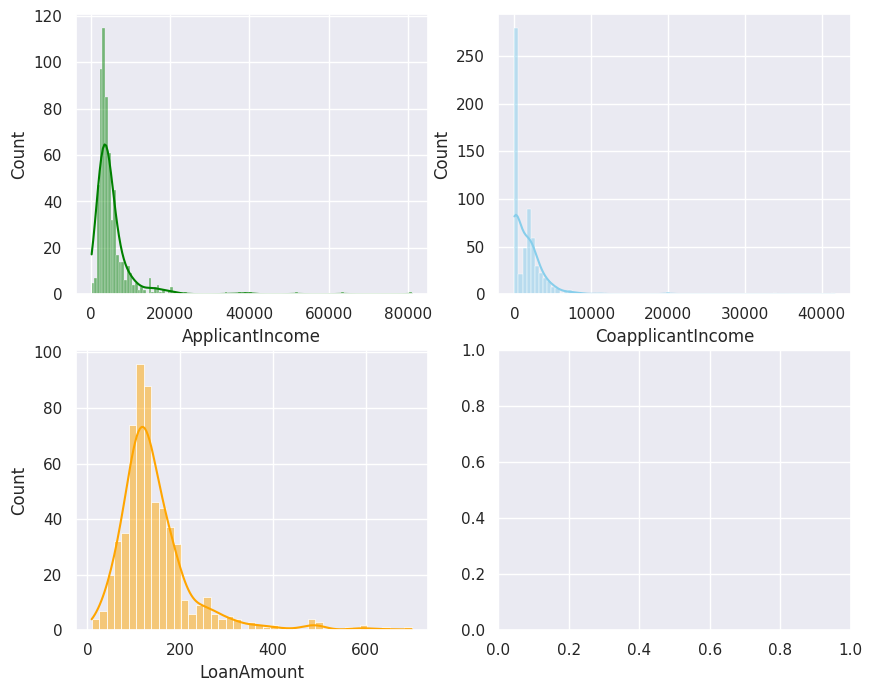

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=loan, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=loan, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=loan, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

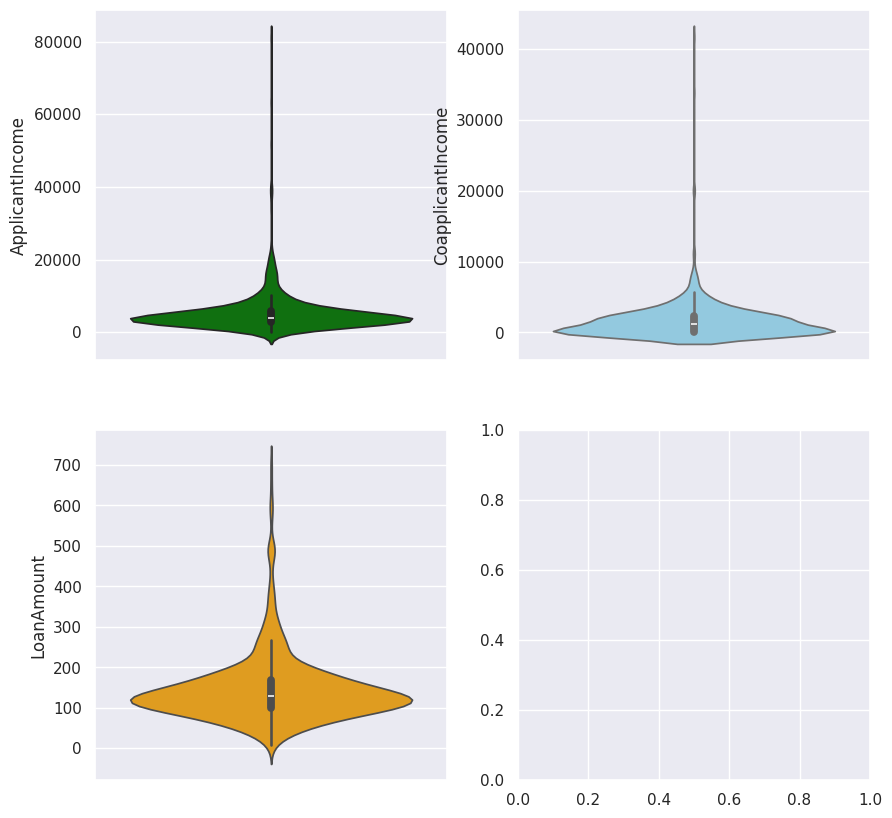

In [ ]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=loan, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=loan, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=loan, y="LoanAmount", ax=axs1[1, 0], color='orange');

Heatmap

In [ ]:
loan_corr = pd.DataFrame(loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
print(loan_corr.corr())

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


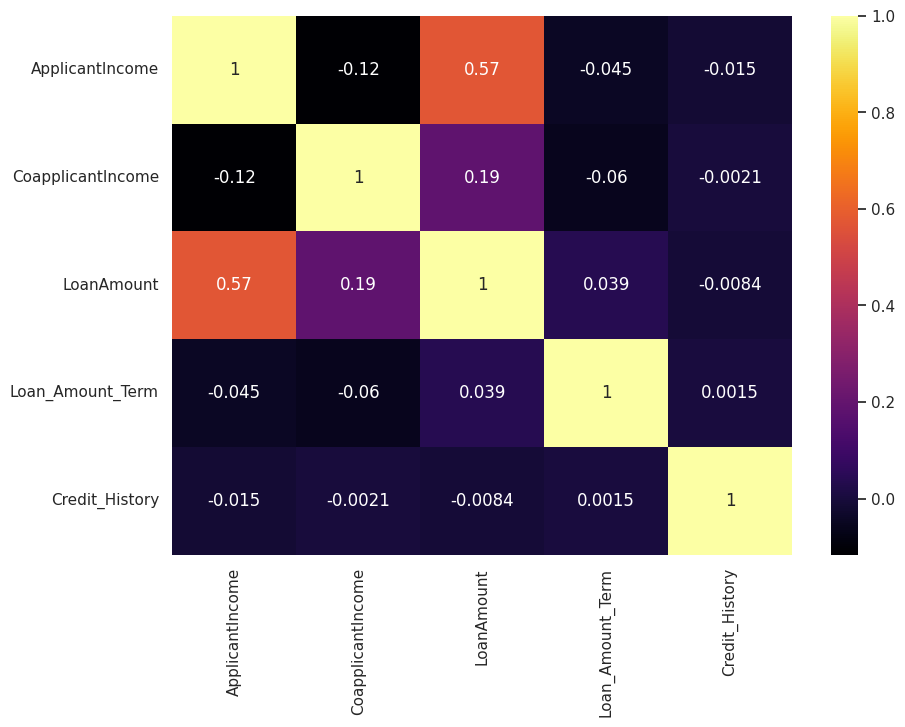

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(loan_corr.corr(), annot=True, cmap='inferno');

# Data Cleaning

In [ ]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Dropping all rows with empty values and creating a new, cleaned dataframe- (CLEANING)
data = loan.dropna()
print("Data dimensions (<rows>, <columns>) : ", data.shape)

Data dimensions (<rows>, <columns>) :  (480, 13)


In [ ]:
#Check data
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0],inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0],inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0],inplace=True)


In [ ]:
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(),inplace=True)

In [ ]:
loan = pd.get_dummies(loan)

# Drop columns
loan = loan.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

loan.rename(columns=new, inplace=True)

In [ ]:
X = loan.drop(["Loan_Status"], axis=1)
y = loan["Loan_Status"]

In [ ]:
X, y = SMOTE().fit_resample(X, y)

<ipython-input-260-648c429efec2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=loan, palette="coolwarm")


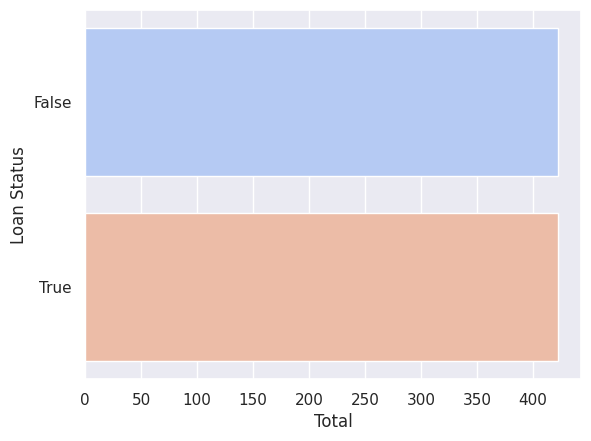

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=loan, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

# Linear Regression


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Intercept of Regression 	: b =  -3.602351750231492e-11
Coefficients of Regression 	: a =  [-4.27316001e-16  1.00346299e-15  6.01454650e-14  7.28414724e-14
 -1.07837350e-11  1.00000000e+00  1.15841226e-11  1.00000000e+00
  1.00000000e+00  1.00000000e+00 -5.21812593e-11  1.00000000e+00
 -5.95744681e-01 -4.15528723e-11 -5.79625237e-12 -4.50571247e-11
  1.00000000e+00  1.00000000e+00 -7.53230811e-12  2.54297315e-11
  1.00000000e+00  1.00000000e+00 -1.18091509e-11  4.46484516e-12
  1.00000000e+00 -3.34549055e-12  1.00000000e+00 -1.29774524e-11
  3.85835808e-12 -3.81406018e-12  1.00000000e+00  1.00000000e+00
 -4.49418280e-12  2.22367541e-11  1.00000000e+00 -1.81664406e-11
  8.67667049e-13 -7.14081572e-14  1.00000000e+00 -5.95744681e-01
  1.00000000e+00 -2.12812268e-11  1.00000000e+00  1.00000000e+00
  5.34017275e-13 -1.00773834e-11  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  2.13351559e-12  1.00000000e+00
  1.00000000e+00 -2.03465578e-11  1.00000000e+00  3.13638004e-13


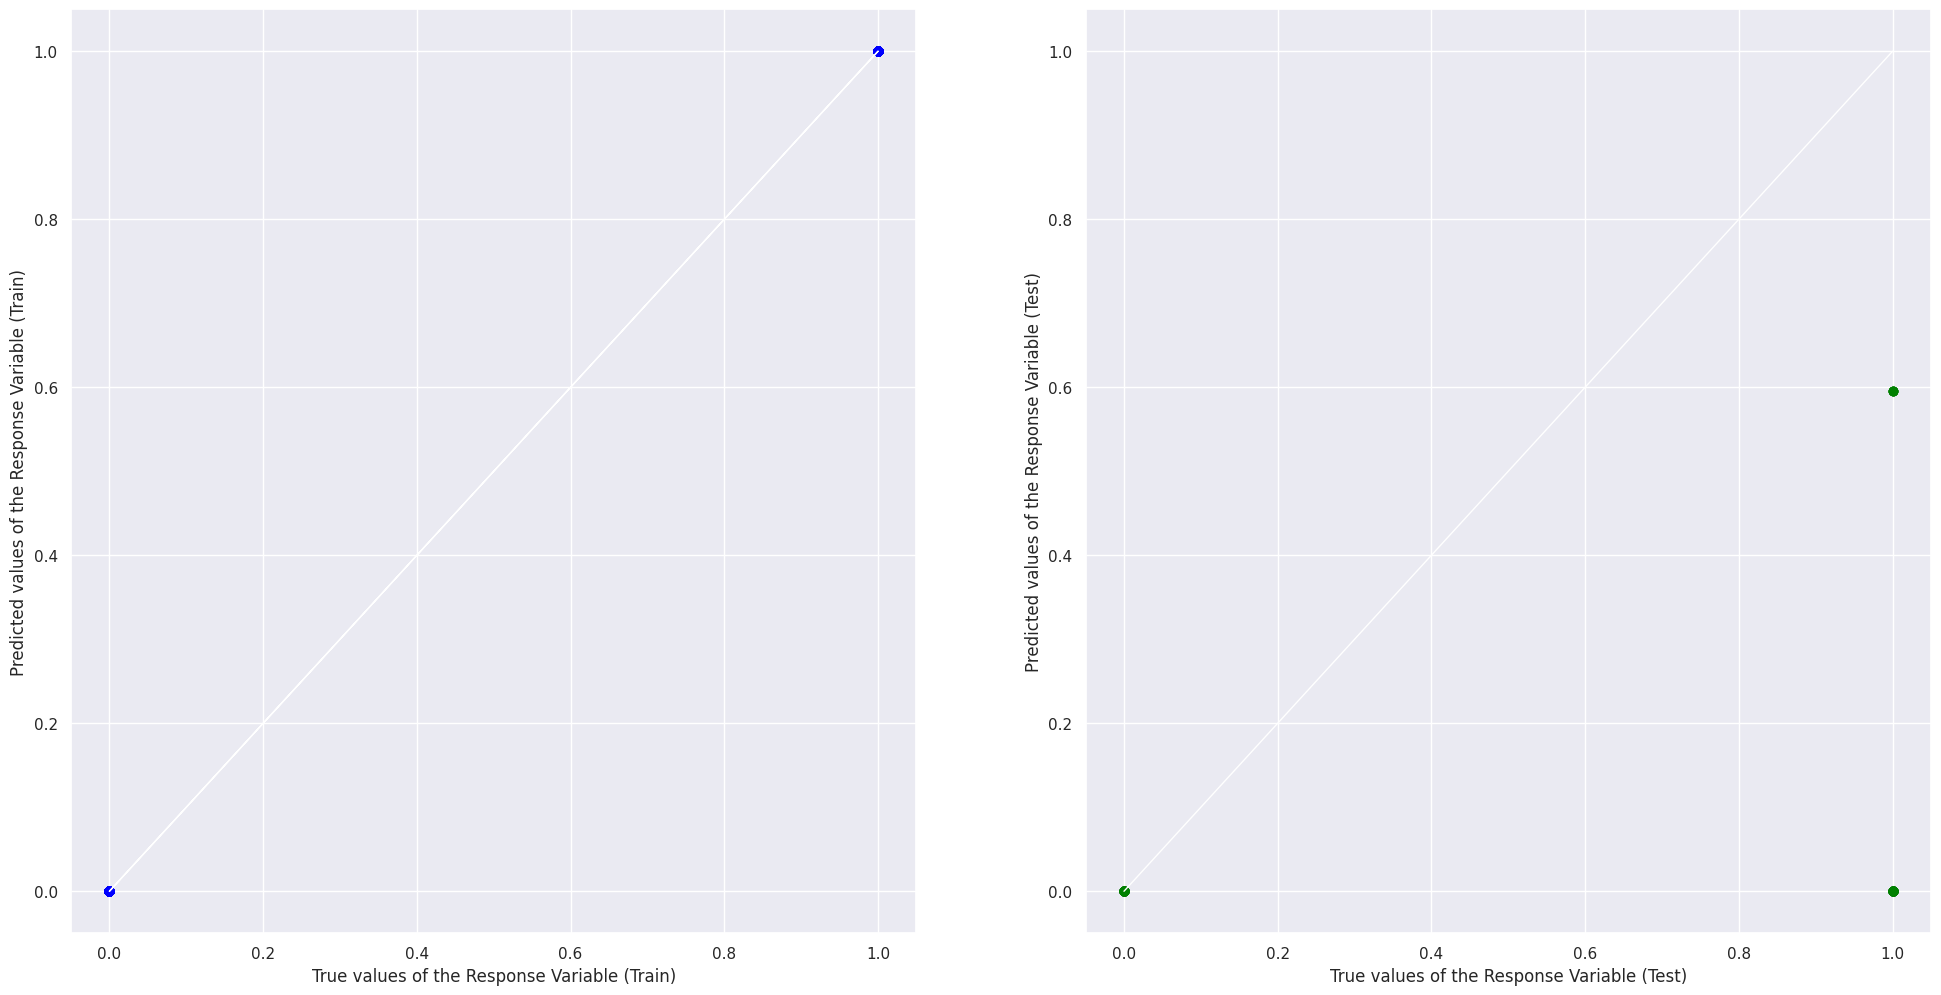

In [ ]:
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to Loan_Status
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=59)
LRclassifier.fit(X_train, y_train)

#Accuracy of Linear Regression
y_pred = LRclassifier.predict(X_test)
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

LR accuracy: 46.15%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# More Metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.47      0.55      0.51        86
        True       0.44      0.37      0.41        83

    accuracy                           0.46       169
   macro avg       0.46      0.46      0.46       169
weighted avg       0.46      0.46      0.46       169

[[47 39]
 [52 31]]


# Decision Tree

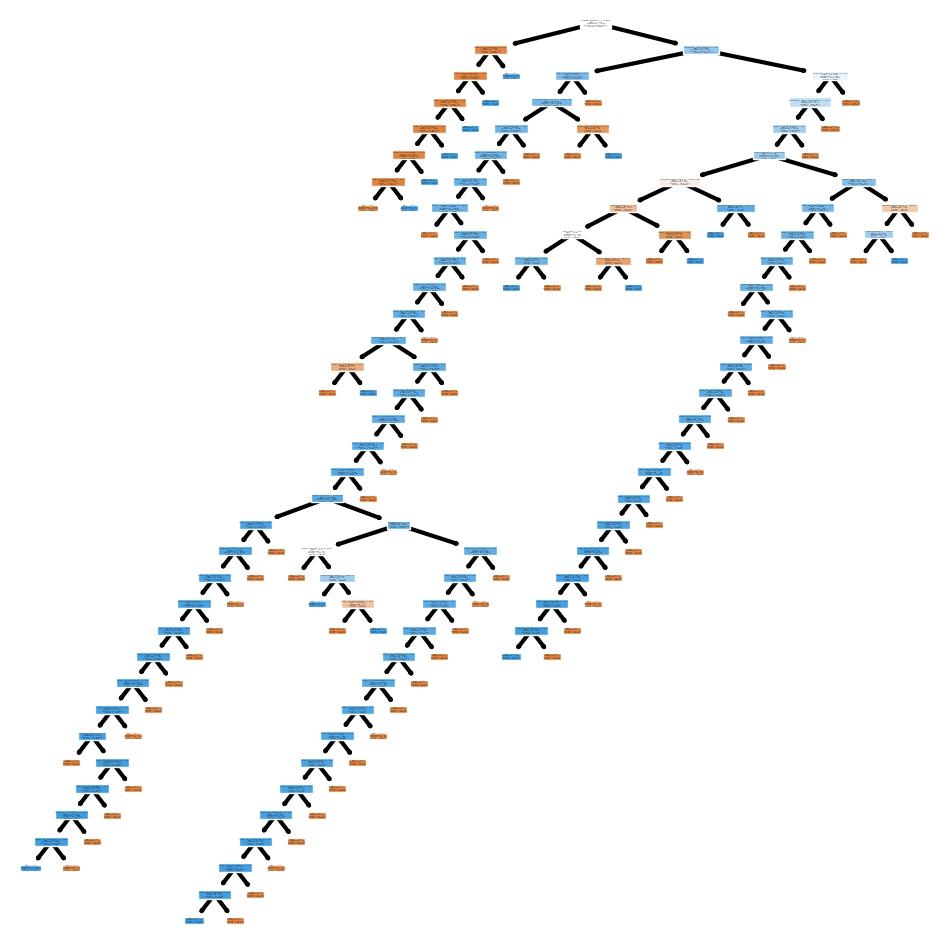

In [ ]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# Define decision tree model
dectree = DecisionTreeClassifier(random_state=0)
# Fit the model on training data
dectree.fit(X_train, y_train)


fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree,
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7688888888888888

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7514792899408284



<Axes: >

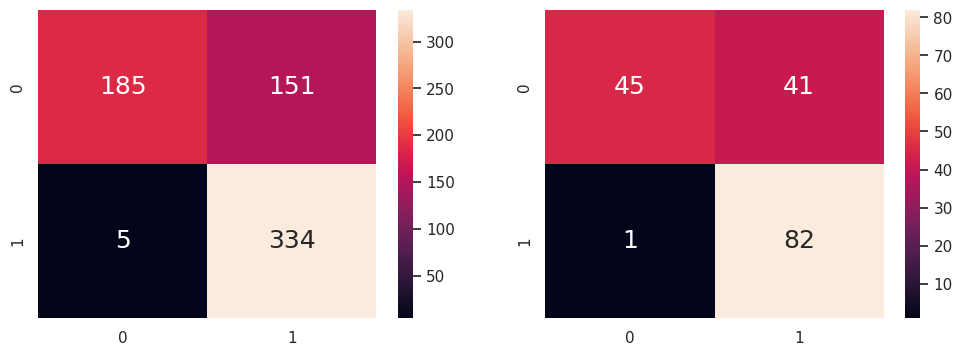

In [ ]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Loan_Staus values corresponding to all features
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Pytorch Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.int64))
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
y_test_tensor = torch.tensor(y_test.values.astype(np.int64))

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Define the neural network with 5 layers
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 100)  # Input to first hidden layer
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(100, 75)  # First to second hidden layer
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(75, 50)  # Second to third hidden layer
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(50, 25)  # Third to fourth hidden layer
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(25, num_classes)  # Fourth to output layer

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.fc5(x)
        return x

# Number of features in dataset
input_size = X_train.shape[1]
num_classes = len(torch.unique(y_train_tensor))

# Create the model
model = NeuralNet(input_size, num_classes)

# Loss and optimizer parameters. (Adjust this for tuning model dont touch the rest!Update Best output:72% )
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,eps=1e-08,weight_decay=1e-5)


# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluating the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the test: {100 * correct / total}%')


Epoch [1/100], Loss: 1.2077
Epoch [2/100], Loss: 0.7457
Epoch [3/100], Loss: 0.8033
Epoch [4/100], Loss: 0.6745
Epoch [5/100], Loss: 0.7004
Epoch [6/100], Loss: 0.7592
Epoch [7/100], Loss: 0.7114
Epoch [8/100], Loss: 0.6688
Epoch [9/100], Loss: 0.7166
Epoch [10/100], Loss: 0.7334
Epoch [11/100], Loss: 0.6379
Epoch [12/100], Loss: 0.7036
Epoch [13/100], Loss: 0.6699
Epoch [14/100], Loss: 0.7168
Epoch [15/100], Loss: 0.7113
Epoch [16/100], Loss: 0.6986
Epoch [17/100], Loss: 0.7040
Epoch [18/100], Loss: 0.6623
Epoch [19/100], Loss: 0.6707
Epoch [20/100], Loss: 0.6508
Epoch [21/100], Loss: 0.6753
Epoch [22/100], Loss: 0.6986
Epoch [23/100], Loss: 0.6306
Epoch [24/100], Loss: 0.6694
Epoch [25/100], Loss: 0.6531
Epoch [26/100], Loss: 0.6866
Epoch [27/100], Loss: 0.6850
Epoch [28/100], Loss: 0.7408
Epoch [29/100], Loss: 0.6471
Epoch [30/100], Loss: 0.7531
Epoch [31/100], Loss: 0.7086
Epoch [32/100], Loss: 0.6509
Epoch [33/100], Loss: 0.6867
Epoch [34/100], Loss: 0.6709
Epoch [35/100], Loss: 0

In [ ]:
#Prof we will now evaluate our findings in the Neural Network.

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation for evaluation
with torch.no_grad():
    predictions = []
    targets = []
    # Iterate over the test data loader
    for data, target in test_loader:
        output = model(data)  # Forward pass
        _, predicted = torch.max(output.data, 1)  # Get the class with the highest probability
        predictions.extend(predicted.numpy())  # Store predictions
        targets.extend(target.numpy())  # Store true targets

# Calculate classification metrics using sklearn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Calculate metrics
accuracy = accuracy_score(targets, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(targets, predictions, average='binary')
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


from sklearn.metrics import mean_squared_error, explained_variance_score
mse = mean_squared_error(targets, predictions)
variance = explained_variance_score(targets, predictions)

print(f'Mean Squared Error: {mse:.4f}')  # MSE usually not expressed in percentage
print(f'Explained Variance: {variance :.2f}')  # Variance can be expressed as percentage



Accuracy: 60.95%
Precision: 58.59%
Recall: 69.88%
F1 Score: 63.74%
Mean Squared Error: 0.3905
Explained Variance: -0.53


After many adjustments to optimizer, learning rate and number of layers in Neural Network, our best findings remain in the 70% region for accuracy. As it is our first time using nerual networks we will take our learnings from how to create a neural networks and hope to apply this in future projects.

This was learnt using Codecademy's course on Pytorch which covered everythin from basics of creating tensors from arrays to creating feedback loops.

We hope that you recognise our effort into making something beyond the classroom.

# Cat-Boost

In [ ]:
#!pip install catboost if any error about module not found

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# CatBoost model
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=6,
    loss_function='Logloss',  #  used for binary classification
    eval_metric='Accuracy',   # Metric for evaluation
    random_seed=42,
    verbose=200  # Output the log every 200 iterations
)

# Fit the model
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True,  # After training, use the model with the best validation score
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7940741	test: 0.7633136	best: 0.7633136 (0)	total: 6.13ms	remaining: 6.12s
200:	learn: 0.8666667	test: 0.8106509	best: 0.8106509 (190)	total: 756ms	remaining: 3s
400:	learn: 0.8755556	test: 0.8284024	best: 0.8284024 (276)	total: 2.09s	remaining: 3.12s
600:	learn: 0.8859259	test: 0.8284024	best: 0.8284024 (276)	total: 3.76s	remaining: 2.5s
800:	learn: 0.8933333	test: 0.8284024	best: 0.8284024 (276)	total: 6.65s	remaining: 1.65s
999:	learn: 0.8918519	test: 0.8343195	best: 0.8343195 (913)	total: 9.7s	remaining: 0us

bestTest = 0.8343195266
bestIteration = 913

Shrink model to first 914 iterations.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the responses for test dataset
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 83.43%
              precision    recall  f1-score   support

       False       0.98      0.69      0.81        86
        True       0.75      0.99      0.85        83

    accuracy                           0.83       169
   macro avg       0.87      0.84      0.83       169
weighted avg       0.87      0.83      0.83       169



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100,  # Number of trees in the forest
                             max_depth=None,    # Max depth of the tree
                             min_samples_split=2,  # Minimum number of samples required to split an internal node
                             min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
                             random_state=42)      # Seed used by the random number generator for reproducibility

# Fit the classifier on the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict the responses for the test dataset
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 86.98%
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.76      0.86        86
        True       0.80      0.99      0.88        83

    accuracy                           0.87       169
   macro avg       0.89      0.87      0.87       169
weighted avg       0.89      0.87      0.87       169



# Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Predict the responses for the test dataset
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 66.86%
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.37      0.53        86
        True       0.60      0.98      0.74        83

    accuracy                           0.67       169
   macro avg       0.77      0.67      0.64       169
weighted avg       0.77      0.67      0.64       169



# Citations



Anshtanwar. (2023, August 24). Credit Risk Prediction |🤖Training and EDA. Kaggle. https://www.kaggle.com/code/anshtanwar/credit-risk-prediction-training-and-eda?rvi=1

Caesarmario. (2022, March 8). 💳💲 Loan Prediction w/ Various ML Models 💵. Kaggle. https://www.kaggle.com/code/caesarmario/loan-prediction-w-various-ml-models

Credit Risk Dataset. (2020, June 2). Kaggle. https://www.kaggle.com/datasets/laotse/credit-risk-dataset?rvi=1

Loan Predication. (2018, March 11). Kaggle. https://www.kaggle.com/datasets/ninzaami/loan-predication
